# UTSA CS 3793: Assignment-1

**Anderson-Pola - Keanu - (tro893)**






In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Learning Objectives


*   Read data from a file and Create a graph
*   Implement Uninformed & Informed searching strategies
*   Apply different searching strategies for the given problem
*   Analyze and Compare the searching strategies


## Description

This assignment is focused on **python file reading, graph creation** and implementation of **search algorithms**.
In the following sections, you will complete a series of tasks for a made up problem of *Coronavirus in Texas*.

*   Coronavirus is non-discriminatory, in the sense that it can spread from one city to any other city. The only goal of the virus is to spread to all cities in Texas. Find a possible way for the virus to spread (Uninformed Search).
*   To counter the effect of the virus, vaccine needs to be distributed to all cities. One city has more demand than supply, whereas one city has a shortage of vaccines. The goal is to find an **optimal** strategy to transport the vaccine (Informed Search) from the city with high supply (low demand) to the city with low supply (high demand).

The base structure and comments are provided on what should be done. You can use some libraries that help support you for the successful completion of the assignment. However, you **CANNOT** use a complete library for the search algorithms. You can get pieces of code from online, but please cite the source properly.


#Reading Data Files & Creating a 2D Graph

##(45 points)

In this section, you will write code to read the data files provided, cities.csv and distances.csv, and create a 2D graph consisting of nodes and edges. The goal is to use this graph for the 2 search agents that you will create in the next section.

Provided with this lab, on Blackboard, you will find 2 csv files:

*   **cities.csv** - This file contains a list of coordinates for selected cities in Texas, in the following format:
```
San Antonio,29.4685,-98.5254
```
The above line means that San Antonio is located at the latitude and longitude of 29.4685 N and 98.5254 W respectively. Note that the '-ve' sign denotes 'S' for latitude and 'W' for longitude. While performing calculations you will need to ignore the sign.

*   **distances.csv** - This file contains distance values between two cities of Texas, if a path exists, in the following format:
```
San Antonio,New Braunfels,30.80876734
```
The above line denotes that there should be an edge between *San Antonio* and *New Braunfels* and the weight on that edge, i.e. the distance, is *30.80876734*.

In the code blocks below, handle the logic for the graph. Load the graph data from the give files and display a 2D graph of the given data, with labeled nodes and edges. Create as many functions or code blocks as needed.

##Extra Credit (4 points)

Overlay the 2D graph on an image of the Texas state map.





In [ ]:
# Add only your imports here
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.image as mpimg


In [ ]:
# Assume that the data files are in the following folder -- THIS WILL BE USED BY THE TA
basePath = "/content/drive/My Drive/Colab Notebooks/Artificial Intelligence/Data/"


In [ ]:
# Load the graph data from the files
cities_path = basePath + 'cities.csv'
distances_path = basePath + 'distances.csv'
cities = pd.read_csv(cities_path, header=None, names=['City', 'Latitude', 'Longitude'])
distances = pd.read_csv(distances_path, header=None, names=['City1', 'City2', 'Distance'])



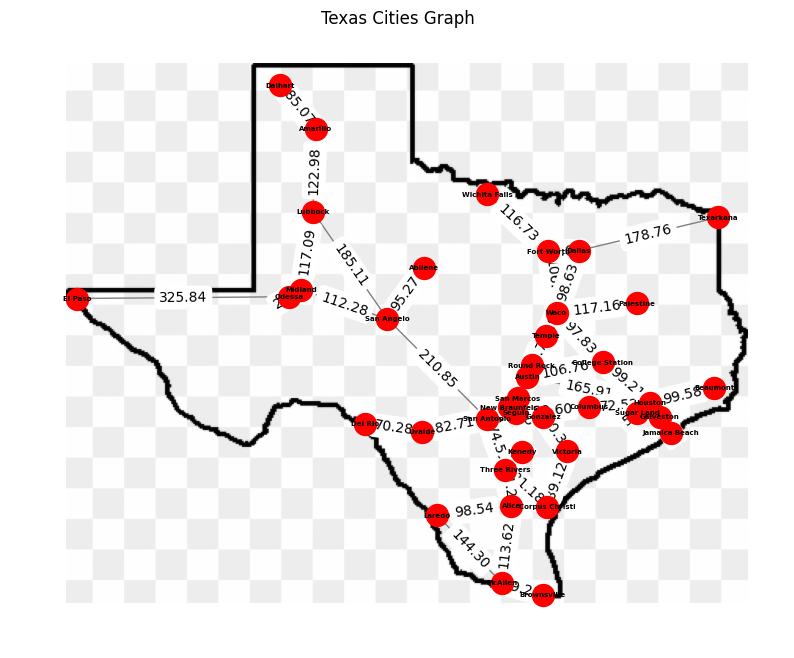

In [ ]:
# Display a 2D graph of the given data.
# Create Graph
G = nx.Graph()
for index, row in cities.iterrows():
    G.add_node(row['City'], pos=(row['Longitude'], row['Latitude']))

for index, row in distances.iterrows():
    G.add_edge(row['City1'], row['City2'], weight=row['Distance'])

# Set positions for each city based on their longitude and latitude
pos = {city: (long, lat) for city, lat, long in cities.to_numpy()}

# Extra Credit: Load the Texas state map image
texas_map = mpimg.imread(basePath + 'texas-map-2.png')

# Create a plot with the Texas map as the background
fig, ax = plt.subplots(figsize=(10, 8))
extent = [-106.65, -93.51, 25.84, 36.5] # Based on El Paso, Texarkana, Brownsville and Dalhart
ax.imshow(texas_map, extent=extent, aspect='auto')
nx.draw(G, pos, with_labels=True, node_color='red', node_size=250, font_size=5, font_weight='bold', edge_color='gray', ax=ax)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(row['City1'], row['City2']): f"{row['Distance']:.2f}" for idx, row in distances.iterrows()}, ax=ax)
plt.title('Texas Cities Graph')
plt.show()


#Virus Spread - Uninformed Search Agent

##(40 points)

In this section, you will use the graph created in the previous section and create an *uninformed search* agent that will print the path how the virus will spread to all the provided Texas cities. The first confirmed case of the virus was in **Three Rivers** and starts spreading from there. The virus does not discriminate and it needs to spread to all the cities of Texas.

In the following code block, write code to implement **any** uninformed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path or sequence of cities that will be infected by the spread of Coronavirus.
*   The distance travelled by the selected virus spreading strategy.

##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Implement ANY uninformed search strategy for the spread of coronavirus from the starting city of 'Three Rivers'
def breadth_first_search(problem, start):
    # Initialize the frontier with the starting node
    frontier = [start]
    # Initialize the explored set to keep track of visited nodes
    explored = set()
    # Initialize the path to keep track of the sequence of cities visited
    path = []

    while frontier:
        # Choose the shallowest node in frontier
        node = frontier.pop(0)
        if node not in explored:
            # Add the node to explored set
            explored.add(node)
            # Append the node to the path
            path.append(node)
            # Expand the node and add its children to the frontier if not explored
            frontier.extend(child for child in problem.neighbors(node) if child not in explored and child not in frontier)

    return path

# Starting city for virus spread
start_city = 'Three Rivers'
spread_path = breadth_first_search(G, start_city)

print("Path of virus spread:", spread_path) # Output 1

# Calculate the total distance traveled by the virus
def calculate_total_distance(graph, path):
    total_distance = 0.0
    for i in range(len(path) - 1):
        city1, city2 = path[i], path[i + 1]
        if graph.has_edge(city1, city2):
            total_distance += graph[city1][city2]['weight']
    return total_distance

total_distance = calculate_total_distance(G, spread_path)
print("Total distance traveled by virus:", total_distance) # Output 2

Path of virus spread: ['Three Rivers', 'San Antonio', 'Corpus Christi', 'Alice', 'Kenedy', 'San Angelo', 'New Braunfels', 'Seguin', 'Uvalde', 'Victoria', 'Laredo', 'McAllen', 'Midland', 'Lubbock', 'Abilene', 'San Marcos', 'Gonzalez', 'Columbus', 'Del Rio', 'Brownsville', 'Odessa', 'Amarillo', 'Austin', 'Houston', 'El Paso', 'Dalhart', 'Round Rock', 'College Station', 'Beaumont', 'Galveston', 'Sugar Land', 'Temple', 'Waco', 'Jamaica Beach', 'Palestine', 'Fort Worth', 'Dallas', 'Wichita Falls', 'Texarkana']
Total distance traveled by virus: 634.26964113


#Vaccine Transportation - Informed Search Agent

##(40 points)

In this section, you will create an *informed search* agent that will be used to transport the vaccine. The city of **San Antonio** has more supply of vaccine than the demand. The goal is to create an **optimal strategy** to transport the vaccine and make it available at the highly affected city of **College Station**, where there is a shortage of vaccines.

In the following code block, write code to implement an **optimal** informed search strategy. You are free to create more code blocks if needed. As the output, print

*   The path / sequence of cities that will be visited in the optimal vaccine transportation strategy.
*   The total distance travelled in the optimal vaccine transportation strategy.


##Extra Credit (3 points)
On the 2D graph and the Texas state map, overlay the selected path along with the cities visited.

In [ ]:
# Calculate the Euclidean distan between two cities
import math

def euclidean_distance(city1, city2):
    lat1, lon1 = G.nodes[city1]['pos']
    lat2, lon2 = G.nodes[city2]['pos']
    return math.sqrt((lat1 - lat2) ** 2 + (lon1 - lon2) ** 2)

In [ ]:
# Implement an OPTIMAL informed search strategy for distributing the vaccine from 'San Antonio' to 'College Station'
def a_star_search(problem, start, goal):
    frontier = [(0, start, [])]  # (cost + heuristic, current_node, path)
    explored = set()
    g_costs = {start: 0}

    while frontier:
        frontier.sort()
        cost, node, path = frontier.pop(0)

        if node == goal:
            return path + [node], cost

        if node not in explored:
            explored.add(node)
            path = path + [node]

            for neighbor in problem.neighbors(node):
                if neighbor not in explored:
                    new_g_cost = g_costs[node] + problem[node][neighbor]['weight']
                    h_cost = euclidean_distance(neighbor, goal)
                    total_cost = new_g_cost + h_cost

                    g_costs[neighbor] = new_g_cost
                    frontier.append((total_cost, neighbor, path))

    return [], 0  # Return empty path and zero cost if no path is found

# Starting and goal cities for vaccine distribution
start_city = 'San Antonio'
goal_city = 'College Station'
optimal_path, total_distance = a_star_search(G, start_city, goal_city)

print("Optimal path for vaccine distribution:", optimal_path)
print("Total distance traveled for optimal path:", total_distance)

Optimal path for vaccine distribution: ['San Antonio', 'New Braunfels', 'San Marcos', 'Austin', 'College Station']
Total distance traveled for optimal path: 186.77450141


#Submission Instructions

1.   Complete all tasks above - **File MUST contain the output for ALL cells**
2.   Export this notebook as .ipynb
      (File > Download as ipynb)
3.   Upload the .ipynb file on Blackboard

##Rubric

*   (45 points) Reading Data files & Creating a 2D Graph
*   (40 points) Virus Spread - Uninformed Search Agent
*   (40 points) Vaccine Transportation - Informed Search Agent
*   (10 points) Extra Credit - on the Texas map image, overlay the 2D graph and the paths selected by the search agents



